
## IT461 Practical Machine learning
### Used Car Prices Dataset

*Project Motivation:*

we want to develop a predictive model that determines consumer car preferences based on a comparison of key car attributes, such as price, mileage, model year, brand popularity, accident history, and fuel type. By building and training models to analyze differences between paired cars. Our project aims to identify the likelihood of one car being preferred over another, providing insights into the factors that influence car purchasing decisions.

*Prepared by:*

Jory Alharbi	443200984

Majd Aljuraysi	443200637

Deem Alshaye	443200583

Norah Mohammed Alwohaibi 	443200753

Razan Aldakhil	443201096


*dataset source:*
https://www.kaggle.com/datasets/taeefnajib/used-car-price-prediction-dataset


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
directory_path = '/content/drive/MyDrive/'
file_name = "/content/used_cars.csv"


Mounted at /content/drive


In [ ]:
!pip install scikeras tensorflow numpy
!pip install scikeras tensorflow numpy
!pip install scikeras


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import itertools
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import itertools
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import itertools
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
# Feature Selection
from sklearn.linear_model import Lasso
from sklearn.feature_selection import RFE, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

# Data Preprocessing
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np
from sklearn.metrics import roc_curve, auc



In [ ]:
df= pd.read_csv("/content/drive/My Drive/used_cars.csv")

In [ ]:
df.head(5)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,Ford,Utility Police Interceptor Base,2013,"51,000 mi.",E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,Yes,"$10,300"
1,Hyundai,Palisade SEL,2021,"34,742 mi.",Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,Yes,"$38,005"
2,Lexus,RX 350 RX 350,2022,"22,372 mi.",Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,NaN,"$54,598"
3,INFINITI,Q50 Hybrid Sport,2015,"88,900 mi.",Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,Yes,"$15,500"
4,Audi,Q3 45 S line Premium Plus,2021,"9,835 mi.",Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,NaN,"$34,999"


## 1- Data cleaning and Inspection

we will start by cleaning or dataset to prepare it for further work, starting by checking for missing values

### Missing values

In [ ]:
missing_values = df.isnull().sum()

# Display columns with missing values
print(missing_values[missing_values > 0])

fuel_type      170
accident       113
clean_title    596
dtype: int64


since these features are signaficant for the user, and inflaunce whether the user would by the car or not, we cant just remove them from our dataset, we will fill these missing values with either the mode, mean or most common type or using clusters with the nearest values in the cluster

In [ ]:
df['fuel_type'].unique()

array(['E85 Flex Fuel', 'Gasoline', 'Hybrid', nan, 'Diesel',
       'Plug-In Hybrid', '–', 'not supported'], dtype=object)

fuel type has "–" and "not supported" and needs to be handeled, we will use numpy to solve this, np.nan represents a "Not a Number" value, which is useful for handling missing values.

In [ ]:
df['fuel_type'] = df['fuel_type'].replace(['–', 'not supported'], np.nan)

In [ ]:
most_common_fuel_type = df['fuel_type'].mode()[0]
df['fuel_type'].fillna(most_common_fuel_type, inplace=True)

<ipython-input-9-fbd709290704>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fuel_type'].fillna(most_common_fuel_type, inplace=True)


In [ ]:
df['clean_title'].fillna('no', inplace=True)

<ipython-input-10-354812eb3226>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['clean_title'].fillna('no', inplace=True)


In [ ]:
df['accident'].unique()

array(['At least 1 accident or damage reported', 'None reported', nan],
      dtype=object)

In [ ]:
# Fill missing values in the 'accident' column with 'None reported'
df['accident'] = df['accident'].fillna('None reported')


In [ ]:
missing_values = df.isnull().sum()

# Display columns with missing values
print(missing_values[missing_values > 0])

Series([], dtype: int64)


In [ ]:
# Descriptive Statistics
print(df.describe())

        model_year
count  4009.000000
mean   2015.515590
std       6.104816
min    1974.000000
25%    2012.000000
50%    2017.000000
75%    2020.000000
max    2024.000000


### duplicate rows

In [ ]:
df_duplicates = df[df.duplicated()]

num_duplicates = df_duplicates.shape[0]
print(f"Number of duplicate rows: {num_duplicates}")

Number of duplicate rows: 0


there are no duplicates rows in our dataset so it doesnt require further investigating

###removing unwanted characters

the milage and the price have "mi" and "$" in each data entry, we will remove them to work better with them

In [ ]:
# Data Cleaning: Remove 'mi.' from 'milage' and '$' from 'price', then convert to numeric
df['milage'] = df['milage'].str.replace(' mi.', '').str.replace(',', '').astype(float)
df['price'] = df['price'].str.replace('$', '').str.replace(',', '').astype(float)

## 2- Preprocessing

For the preprocessing section, we’ll focus on encoding categorical features and normalizing numerical ones to ensure the model performs optimally

### Encoding

In [ ]:
df['clean_title'].unique()

array(['Yes', 'no'], dtype=object)

In [ ]:
df['brand'].unique()

array(['Ford', 'Hyundai', 'Lexus', 'INFINITI', 'Audi', 'Acura', 'BMW',
       'Tesla', 'Land', 'Aston', 'Toyota', 'Lincoln', 'Jaguar',
       'Mercedes-Benz', 'Dodge', 'Nissan', 'Genesis', 'Chevrolet', 'Kia',
       'Jeep', 'Bentley', 'Honda', 'Lucid', 'MINI', 'Porsche', 'Hummer',
       'Chrysler', 'Volvo', 'Cadillac', 'Lamborghini', 'Maserati',
       'Volkswagen', 'Subaru', 'Rivian', 'GMC', 'RAM', 'Alfa', 'Ferrari',
       'Scion', 'Mitsubishi', 'Mazda', 'Saturn', 'Bugatti', 'Polestar',
       'Rolls-Royce', 'McLaren', 'Buick', 'Lotus', 'Pontiac', 'FIAT',
       'Karma', 'Saab', 'Mercury', 'Plymouth', 'smart', 'Maybach',
       'Suzuki'], dtype=object)

In [ ]:
# Encode 'clean_title' column with 1 for 'Yes' and 0 for 'Missing'
df['clean_title_ecnoded'] = df['clean_title'].map({
    'Yes': 1,
    'Missing': 0
}).fillna(0).astype(int)


In [ ]:
df['fuel_type_encoded'] = df['fuel_type'].astype('category').cat.codes


In [ ]:
df['accident_encoded'] = df['accident'].map({
    'At least 1 accident or damage reported': 1,
    'None reported': 0
})

In [ ]:
scaler = MinMaxScaler()

# Apply Min-Max Scaling to 'price' and 'milage'
df[['price_norm', 'milage_norm']] = scaler.fit_transform(df[['price', 'milage']])

###feature engineering

Feature engineering is a critical step in data preprocessing that involves transforming raw data into meaningful features to improve model performance. This process helps highlight important patterns, reduces noise, and allows machine learning models to better understand the underlying data. Here are some key feature engineering techniques applied to the dataset:

1- Binning/Grouping Numerical Features

Binning Mileage: Instead of using raw mileage,we will  group cars into mileage bins (e.g., 0-25,000 miles, 25,001-50,000 miles, etc.) to reduce the variability and make the model capture trends better.

In [ ]:
mileage_bins = [0, 25000, 50000, 75000, 100000, 150000, 200000]
df['mileage_bin'] = pd.cut(df['milage'], bins=mileage_bins, labels=['0-25k', '25k-50k', '50k-75k', '75k-100k', '100k-150k', '150k+'])


Binning Price: Group cars into price ranges (e.g., budget, mid-range, luxury) based on thresholds.

In [ ]:
price_bins = [0, 20000, 50000, 100000, 200000, df['price'].max()]
df['price_category'] = pd.cut(df['price'], bins=price_bins, labels=['Budget', 'Mid-range', 'Premium', 'Luxury', 'Super Luxury'])


In [ ]:
# Encode 'price_category' column
df['price_category_encoded'] = df['price_category'].astype('category').cat.codes

# Encode 'mileage_bin' column
df['mileage_bin_encoded'] = df['mileage_bin'].astype('category').cat.codes

2- Creating new features

Brand Popularity
Creating a feature that represents the popularity of a car brand by counting how many cars of each brand are in the dataset. Popular brands might have higher resale values.

In [ ]:
df['brand_popularity'] = df['brand'].map(df['brand'].value_counts())


Create a feature that represents the age of a car by calculating the difference between the current year and the car's model year. Older cars tend to have different pricing and usage patterns compared to newer models, and the age feature helps capture this information.

In [ ]:
df['car_age'] = 2024 - df['model_year']

# Check for zeros in the car_age column
if (df['car_age'] == 0).any():
    # Optional: Drop rows with zero car_age or handle as needed
    df = df[df['car_age'] != 0]  # Drop rows with zero car_age


In [ ]:
has_zeros = (df['car_age'] == 0).any()
print(f"Are there any zeros in 'car_age'? {has_zeros}")

Are there any zeros in 'car_age'? False


3- Interaction Features

Mileage to Age Ratio: A feature that represents how much the car has been driven relative to its age. This can provide insight into whether the car is heavily or lightly used.

In [ ]:


df['mileage_to_age_ratio'] = df['milage'] / df['car_age']



<ipython-input-29-17abf0f69b65>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mileage_to_age_ratio'] = df['milage'] / df['car_age']


Price-to-Age Ratio: This feature would capture how expensive the car is relative to its age, helping to differentiate between cheaper older cars and expensive older models.

In [ ]:
df['price_to_age_ratio'] = df['price'] / df['car_age']


<ipython-input-30-7e70c457fd6c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_to_age_ratio'] = df['price'] / df['car_age']


In [ ]:

# Define the categories with a specific order
ordered_categories = ['Budget', 'Mid-range', 'Premium', 'Luxury', 'Super Luxury']

# Create a categorical series with ordered categories and encode
df['encoded_price_category'] = pd.Categorical(df['price_category'], categories=ordered_categories, ordered=True).codes

# Display the DataFrame with the encoded column

<ipython-input-31-97f4174edce2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['encoded_price_category'] = pd.Categorical(df['price_category'], categories=ordered_categories, ordered=True).codes


In [ ]:
label_encoder = LabelEncoder()
df['encoded_transmission'] = label_encoder.fit_transform(df['transmission'])


<ipython-input-32-0856accba36d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['encoded_transmission'] = label_encoder.fit_transform(df['transmission'])


In [ ]:
df['brand'].unique()

array(['Ford', 'Hyundai', 'Lexus', 'INFINITI', 'Audi', 'Acura', 'BMW',
       'Tesla', 'Land', 'Aston', 'Toyota', 'Lincoln', 'Jaguar',
       'Mercedes-Benz', 'Dodge', 'Nissan', 'Genesis', 'Chevrolet', 'Kia',
       'Jeep', 'Bentley', 'Honda', 'Lucid', 'MINI', 'Porsche', 'Hummer',
       'Chrysler', 'Volvo', 'Cadillac', 'Lamborghini', 'Maserati',
       'Volkswagen', 'Subaru', 'Rivian', 'GMC', 'RAM', 'Alfa', 'Ferrari',
       'Scion', 'Mitsubishi', 'Mazda', 'Saturn', 'Bugatti', 'Polestar',
       'Rolls-Royce', 'McLaren', 'Buick', 'Lotus', 'Pontiac', 'FIAT',
       'Karma', 'Saab', 'Mercury', 'Plymouth', 'smart', 'Maybach',
       'Suzuki'], dtype=object)

In [ ]:
df['encoded_brand'] = label_encoder.fit_transform(df['brand'])

In [ ]:
df.head(5)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,...,price_category,price_category_encoded,mileage_bin_encoded,brand_popularity,car_age,mileage_to_age_ratio,price_to_age_ratio,encoded_price_category,encoded_transmission,encoded_brand
0,Ford,Utility Police Interceptor Base,2013,51000.0,E85 Flex Fuel,300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,6-Speed A/T,Black,Black,At least 1 accident or damage reported,...,Budget,0,2,386,11,4636.363636,936.363636,0,16,14
1,Hyundai,Palisade SEL,2021,34742.0,Gasoline,3.8L V6 24V GDI DOHC,8-Speed Automatic,Moonlight Cloud,Gray,At least 1 accident or damage reported,...,Mid-range,1,1,72,3,11580.666667,12668.333333,1,32,19
2,Lexus,RX 350 RX 350,2022,22372.0,Gasoline,3.5 Liter DOHC,Automatic,Blue,Black,None reported,...,Premium,2,0,163,2,11186.000000,27299.000000,2,40,27
3,INFINITI,Q50 Hybrid Sport,2015,88900.0,Hybrid,354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,7-Speed A/T,Black,Black,None reported,...,Budget,0,3,59,9,9877.777778,1722.222222,0,23,20
4,Audi,Q3 45 S line Premium Plus,2021,9835.0,Gasoline,2.0L I4 16V GDI DOHC Turbo,8-Speed Automatic,Glacier White Metallic,Black,None reported,...,Mid-range,1,0,200,3,3278.333333,11666.333333,1,32,3


## 3- EDA

Visualizing Data Distributions

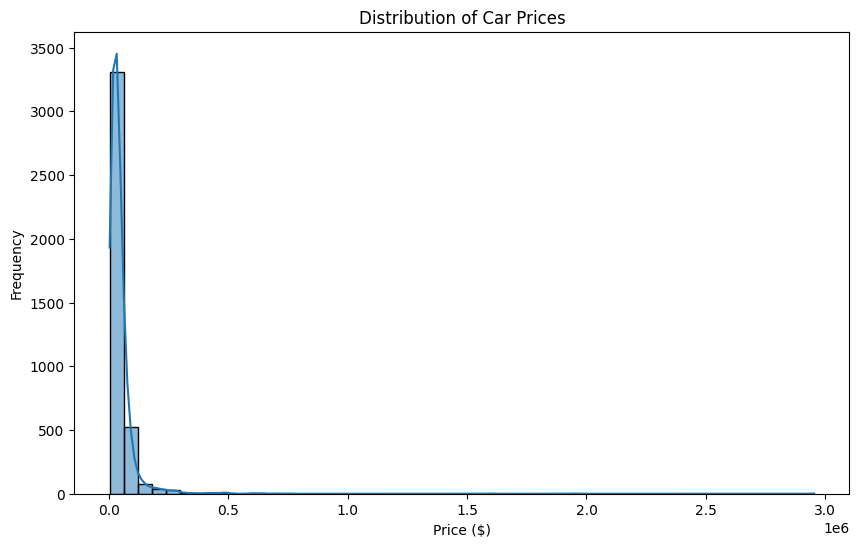

In [ ]:
# Price Distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

The output of the **car price distribution plot** shows the following:

- **Most car prices** are concentrated on the left side of the graph, close to \$0, with a high frequency of cars priced below \$100,000.
- The **peak** at the beginning indicates that a large number of cars have prices within a lower range (likely between \$10,000 and \$50,000).
- There are a few **outliers**—cars priced well over \$1 million, but these are very rare, as shown by the flat, extended tail on the right side of the plot.

This type of distribution is **right-skewed** (positively skewed), meaning there are a few extremely high prices that stretch the distribution toward higher values, but most cars are priced lower.

Data visualization

Distribution of Car Mileage


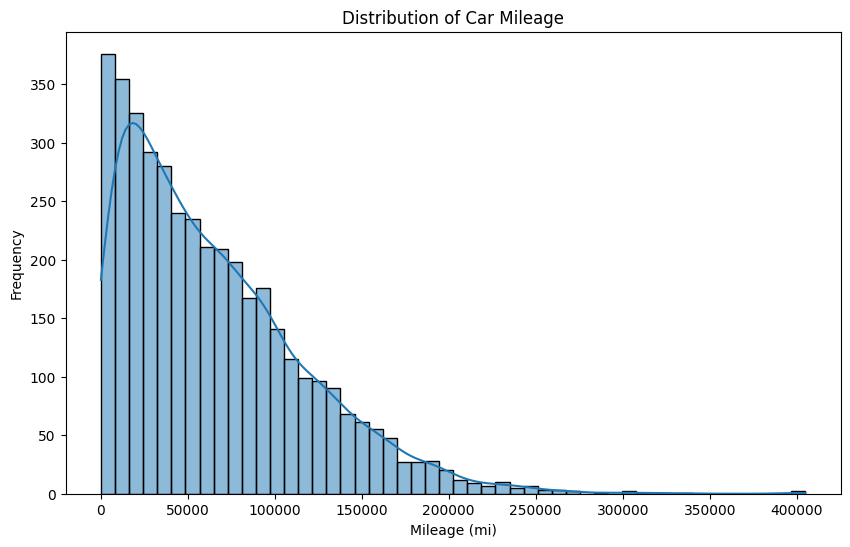

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['milage'], bins=50, kde=True)
plt.title('Distribution of Car Mileage')
plt.xlabel('Mileage (mi)')
plt.ylabel('Frequency')
plt.show()


The graph shows the distribution of car mileage. It has a clear downward trend, indicating that cars with lower mileage are much more common than cars with higher mileage.

The graph starts with a tall peak on the left side, representing a large number of cars with relatively low mileage, likely newer or well-maintained vehicles.

As the mileage increases towards the right side of the graph, the number of cars with that mileage decreases rapidly. This reflects the reality that as cars are driven and accumulate more miles over time, there are fewer and fewer cars with higher mileage.

The shape of the graph resembles an exponential curve, which is a common way to model this kind of decreasing distribution. It shows that low-mileage cars are very common, while high-mileage cars become increasingly rare.

Mileage vs Price

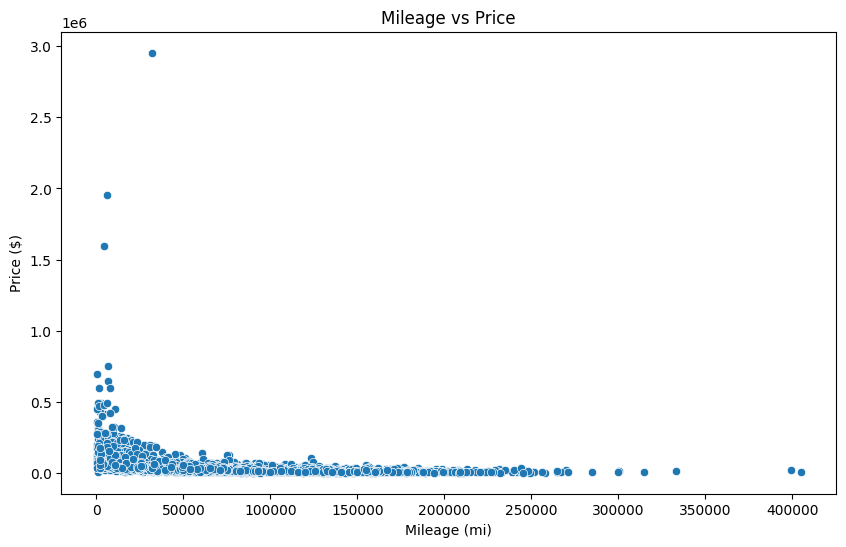

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['milage'], y=df['price'])
plt.title('Mileage vs Price')
plt.xlabel('Mileage (mi)')
plt.ylabel('Price ($)')
plt.show()


This scatter plot shows that cars with more miles tend to cost less:

Low mileage cars (under 50,000 miles) generally have higher prices.
Higher mileage cars (above 100,000 miles) mostly have lower prices.
There are a few expensive outliers (over $1 million), likely luxury or rare cars, that don't follow this trend.
 more mileage = lower price, but some special cars are priced high despite their mileage.

Model Year and Mileage Insights


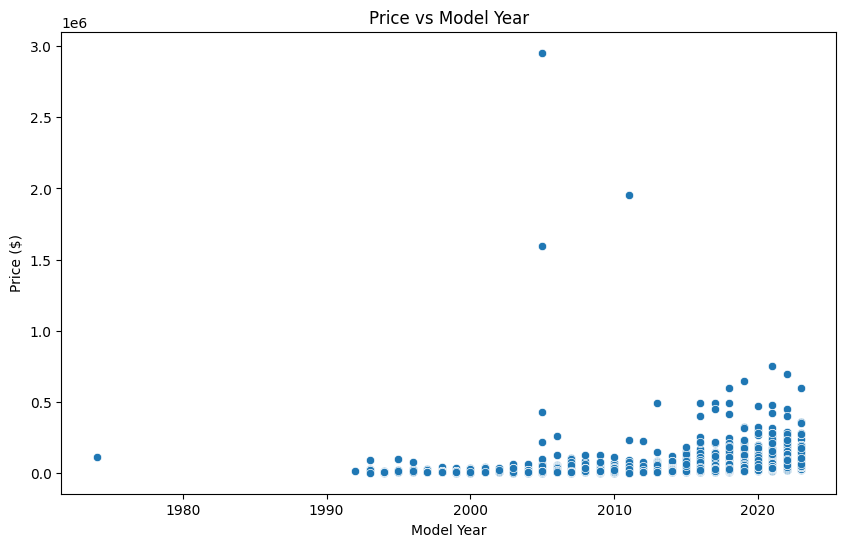

In [ ]:
# Correlation analysis
price_model_year_corr = df[['model_year', 'price']].corr().iloc[0, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['model_year'], y=df['price'])
plt.title('Price vs Model Year')
plt.xlabel('Model Year')
plt.ylabel('Price ($)')
plt.show()


Positive Correlation: There is a general positive trend where newer cars (more recent model years) tend to have higher prices.

Outliers: The outliers in the graph suggest that for some model years, certain cars can be significantly more expensive than average, likely due to their luxury status, rarity, or other factors.
This graph shows how car prices are largely influenced by the model year, with newer cars generally costing more, but with several high-priced outliers skewing the overall distribution.

Accident History and Its Impact on Car Prices


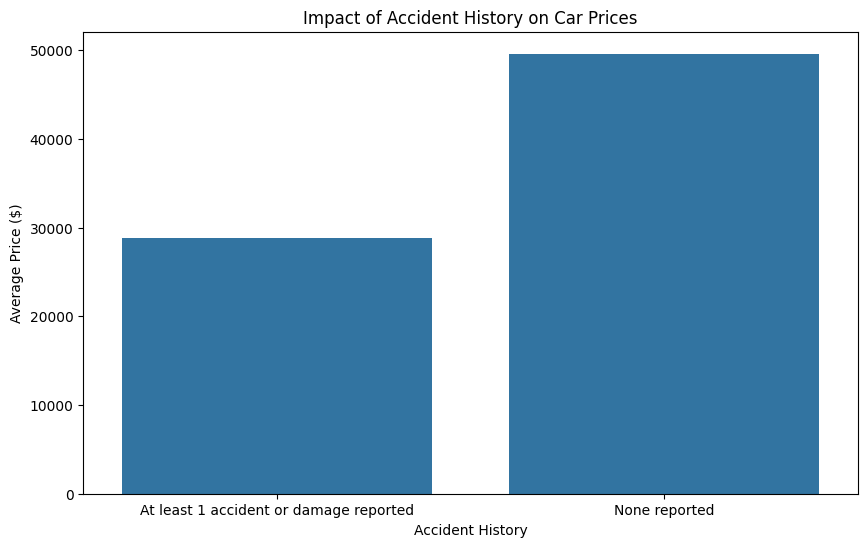

In [ ]:
# Grouping by accident history and getting the average price
accident_price_mean = df.groupby('accident')['price'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=accident_price_mean.index, y=accident_price_mean.values)
plt.title('Impact of Accident History on Car Prices')
plt.xlabel('Accident History')
plt.ylabel('Average Price ($)')
plt.show()


This graph clearly shows that accident history has a strong negative impact on car prices, with cars without accidents being valued significantly higher than those with reported damage.

Count of Cars by Brand

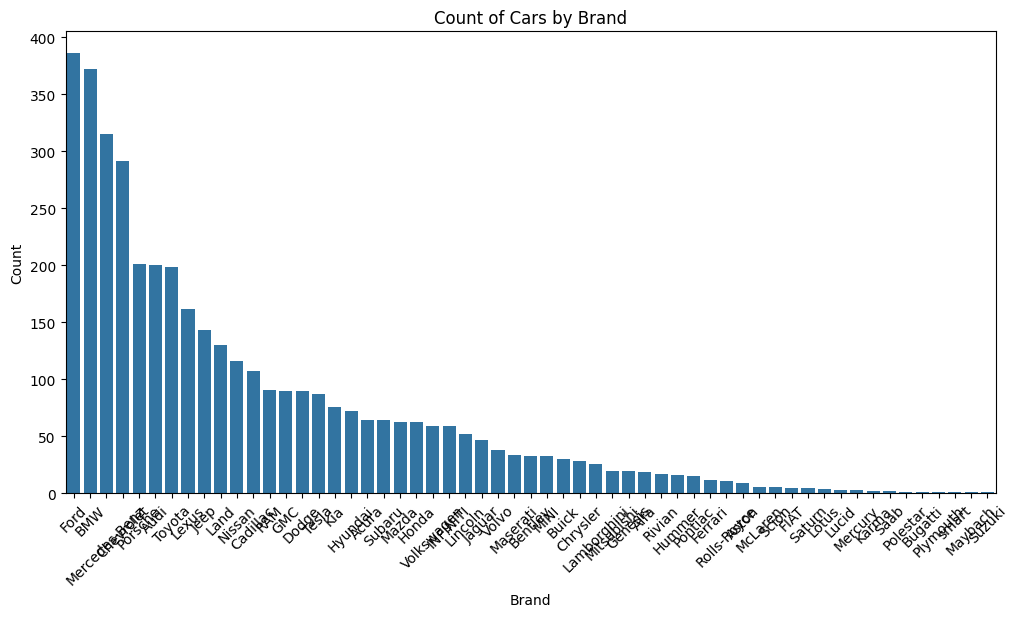

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='brand', order=df['brand'].value_counts().index)
plt.title('Count of Cars by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


This bar chart displays the count of cars for each brand in the dataset. The bars represent the number of listings available per brand, sorted in descending order. Brands like Ford, BMW, and Mercedes-Benz have the highest counts, indicating these are the most commonly listed cars. As we move to the right, brands like Rolls-Royce, Bugatti, and Maybach have much lower counts, showing that they are rarer in this dataset. This distribution gives a sense of each brand's market presence and availability in the data.

 Boxplot of Prices by Brand

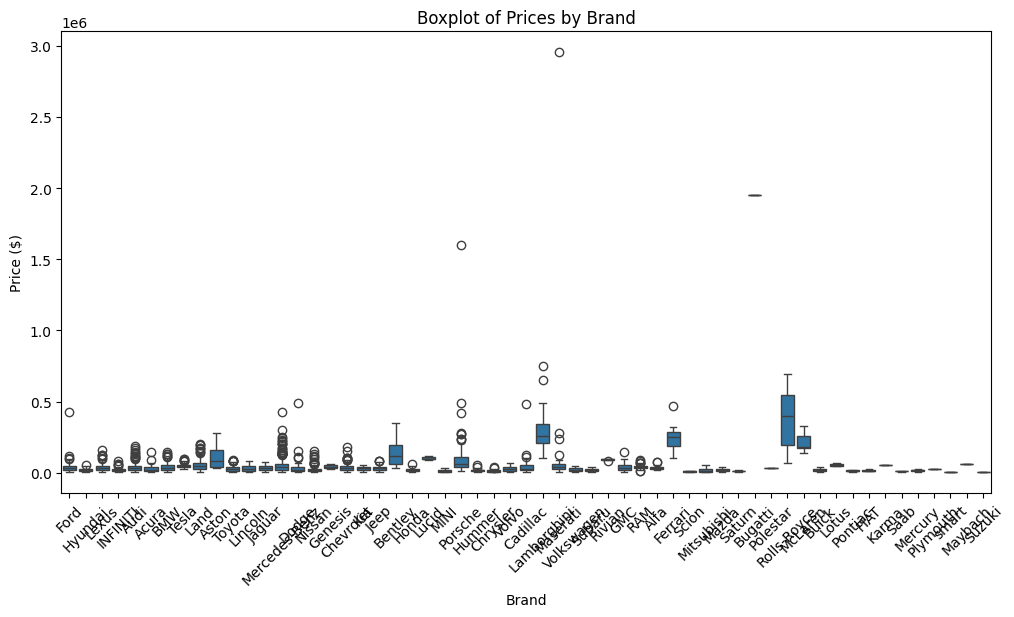

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='brand', y='price')
plt.title('Boxplot of Prices by Brand')
plt.xlabel('Brand')
plt.ylabel('Price ($)')
plt.xticks(rotation=45)
plt.show()

------------

The boxplot visualizes the distribution of car prices across different brands. Each box represents the interquartile range (IQR) of prices for a specific brand, with the median price marked by a horizontal line inside each box. The "whiskers" extend to the minimum and maximum values within 1.5 times the IQR, while points outside this range are considered outliers (shown as circles). Brands like Rolls-Royce, Bugatti, and Lamborghini have higher median prices and more outliers, indicating a wider range of luxury car prices. Meanwhile, brands like Ford and Hyundai have prices clustered near the lower end, with fewer outliers.

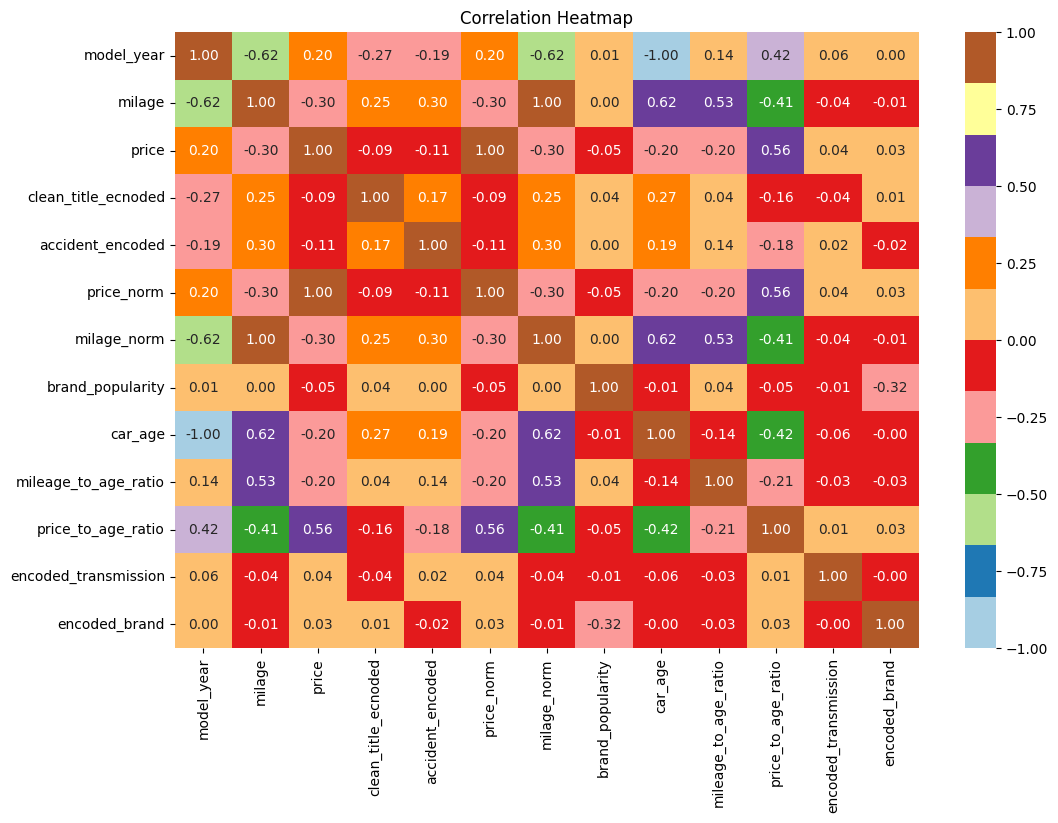

In [ ]:
import seaborn as sns
numeric_df = df.select_dtypes(include=[float, int])

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='Paired', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

#4- Building The model

in this section, we will bulid three base models to compare with our NN model. we are doing this because by creating simple models like Logistic Regression and Support Vector Machines , we establish benchmarks for the performance that our NN model must at least match or exceed.



### Feature selection

before we bulid the models we should perform feature selection to select only the relevent features to use in the model, this process is impotant so we dont overfit the model, also since feature selection helps identify which features truly drive the predictions

using the ***encoded and numeric*** features only since

1- we are finding the pair of cars by finding the difference between them.

2- the algorithems we are using perform mathmatical equations on the data so it should be numerical.

In [ ]:
numeric_columns = df.select_dtypes(include=['number']).columns

# Display the numeric columns' names
print(numeric_columns)


Index(['model_year', 'milage', 'price', 'clean_title_ecnoded',
       'fuel_type_encoded', 'accident_encoded', 'price_norm', 'milage_norm',
       'price_category_encoded', 'mileage_bin_encoded', 'brand_popularity',
       'car_age', 'mileage_to_age_ratio', 'price_to_age_ratio',
       'encoded_price_category', 'encoded_transmission', 'encoded_brand'],
      dtype='object')


In [ ]:
# --- Generate Unique Car Pairs ---
features = ['model_year', 'milage', 'clean_title_ecnoded',
            'fuel_type_encoded', 'accident_encoded', 'price_norm', 'brand_popularity',
            'car_age', 'mileage_to_age_ratio', 'encoded_transmission', 'encoded_brand']

# Generate car pairs
car_indices = list(df.index)
car_pairs = list(itertools.combinations(car_indices, 2))  # Generate all combinations
pair_sample_size = 5000
car_pairs_sampled = random.sample(car_pairs, min(pair_sample_size, len(car_pairs)))  # Randomly sample pairs

# Prepare data for pairs
pair_data = []
pair_labels = []

for idx1, idx2 in car_pairs_sampled:
    car1 = df.loc[idx1, features].values
    car2 = df.loc[idx2, features].values
    diff = car1 - car2
    pair_data.append(diff)
    label = 1 if df.loc[idx1, 'price'] < df.loc[idx2, 'price'] else 0
    pair_labels.append(label)

X = pd.DataFrame(pair_data, columns=features)
y = pd.Series(pair_labels)

# --- Feature Selection Methods ---
# 1. Lasso Regularization
lasso = Lasso(alpha=0.1)
lasso.fit(X, y)
selected_features_lasso = X.columns[lasso.coef_ != 0]

# 2. Recursive Feature Elimination (RFE)
model_rf = RandomForestClassifier(random_state=42)
rfe = RFE(model_rf, n_features_to_select=10)
rfe.fit(X, y)
selected_features_rfe = X.columns[rfe.support_]

# 3. Random Forest Feature Importance
model_rf.fit(X, y)
importances = model_rf.feature_importances_
indices_rf = np.argsort(importances)[::-1][:10]
selected_features_rf = X.columns[indices_rf]

# 4. Mutual Information
mutual_info = mutual_info_classif(X, y)
indices_mi = np.argsort(mutual_info)[::-1][:10]
selected_features_mi = X.columns[indices_mi]

# Combine the selected features
selected_features_combined = list(
    set(selected_features_lasso) &
    set(selected_features_rfe) &
    set(selected_features_rf) &
    set(selected_features_mi)
)
print("Combined selected features:", selected_features_combined)

# Prepare data with selected features
X_selected = X[selected_features_combined]

# --- Split the dataset into training and testing sets ---
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Combined selected features: ['model_year', 'brand_popularity', 'milage', 'mileage_to_age_ratio', 'encoded_brand']


In [ ]:

# Check the unique values in the target variable
unique_classes = np.unique(y_train)

# Print the unique classes
print("Unique classes in the target variable:", unique_classes)


Unique classes in the target variable: [0 1]


In [ ]:
y_train.value_counts()
y_test.value_counts()


,count
0,574
1,426


## A)  models:

### Logistic regression ( Base model)

We begin with logistic regression as the base model due to its simplicity and interpretability for binary classification tasks


In [ ]:
# Initialize logistic regression
log_reg = LogisticRegression(max_iter=1000)

# Define hyperparameter distribution with corrected solver and penalty combinations
param_dist = [
    # For l1 penalty, only 'liblinear' solver is valid
    {'penalty': ['l1'], 'solver': ['liblinear'], 'C': [0.1, 1, 10, 100]},

    # For l2 penalty, we can use 'liblinear', 'lbfgs', or 'saga'
    {'penalty': ['l2'], 'solver': ['liblinear', 'lbfgs', 'saga'], 'C': [0.1, 1, 10, 100]}
]

# Randomized search with cross-validation
random_search = RandomizedSearchCV(
    log_reg,
    param_distributions=param_dist,
    n_iter=25,  # Number of random combinations
    cv=3,
    scoring='accuracy',
    verbose=1,
    n_jobs=-1,
    random_state=42
)

# Fit the model
random_search.fit(X_train, y_train)

# Best model and parameters
best_model = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)


Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 16 is smaller than n_iter=25. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters: {'solver': 'liblinear', 'penalty': 'l1', 'C': 10}


ROC AUC Score: 0.88
Optimal Threshold: 0.44


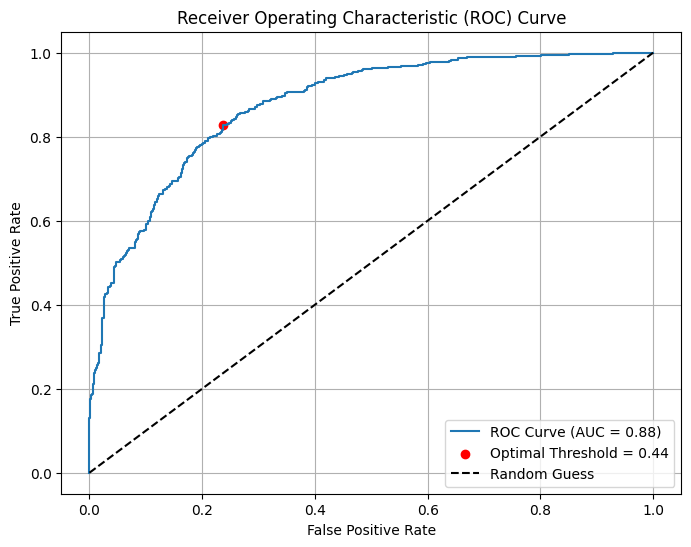

In [ ]:


# Predict probabilities
y_probs = best_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC AUC Score: {roc_auc:.2f}")

# Find the optimal threshold
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold:.2f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f"Optimal Threshold = {optimal_threshold:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:

# Adjust predictions based on the optimal threshold
y_pred_optimal = (y_probs >= optimal_threshold).astype(int)

# Evaluate the model
print("Accuracy with Optimal Threshold:", accuracy_score(y_test, y_pred_optimal))
print("Classification Report with Optimal Threshold:\n", classification_report(y_test, y_pred_optimal))

Accuracy with Optimal Threshold: 0.791
Classification Report with Optimal Threshold:
               precision    recall  f1-score   support

           0       0.86      0.76      0.81       574
           1       0.72      0.83      0.77       426

    accuracy                           0.79      1000
   macro avg       0.79      0.80      0.79      1000
weighted avg       0.80      0.79      0.79      1000



### SVM

Now we will use Support Vector Machine (SVM) model

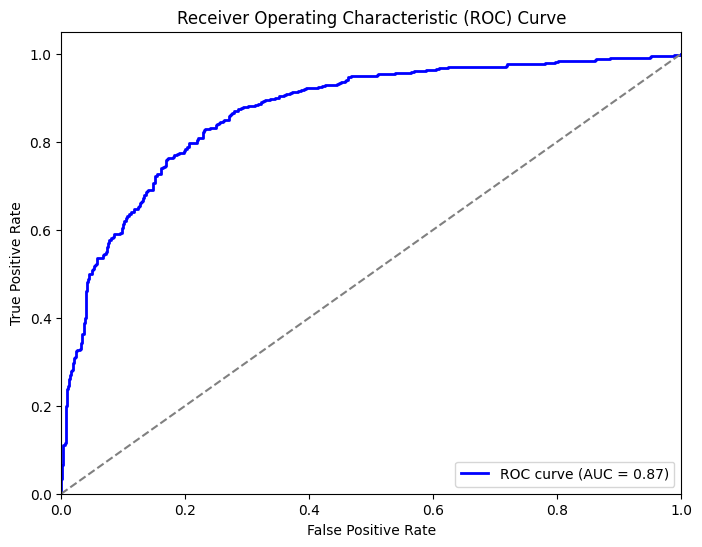

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.83       574
           1       0.76      0.76      0.76       426

    accuracy                           0.80      1000
   macro avg       0.79      0.79      0.79      1000
weighted avg       0.80      0.80      0.80      1000



In [ ]:
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train_scaled, y_train)

y_pred_prob = svm_model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1 (positive class)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

y_pred = svm_model.predict(X_test_scaled)
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


### Ensambles

Next, we will build multiple ensemble methods

--- 10-Fold Cross-Validation on Training/Validation Set ---

Voting Classifier 10-Fold Cross-Validation Classification Report:
              precision    recall  f1-score   support

           0     0.7863    0.8019    0.7940      2120
           1     0.7715    0.7543    0.7628      1880

    accuracy                         0.7795      4000
   macro avg     0.7789    0.7781    0.7784      4000
weighted avg     0.7793    0.7795    0.7793      4000

Voting Classifier 10-Fold Cross-Validation ROC AUC Score: 0.87
Optimal Threshold for Voting Classifier: 0.46


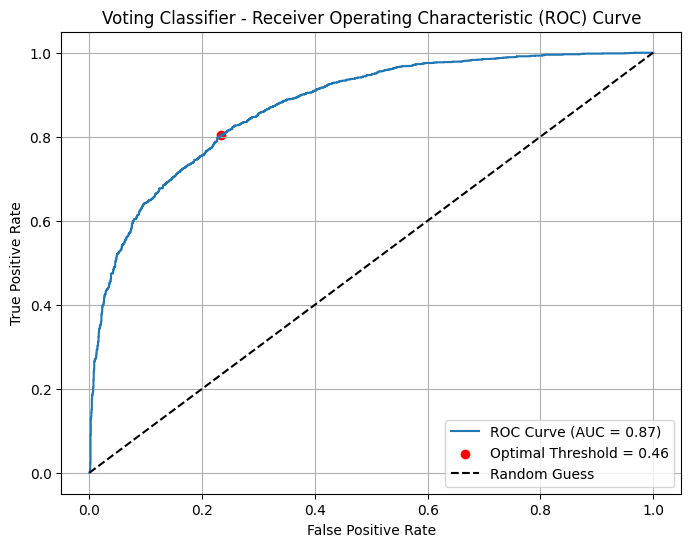


Bagging Classifier 10-Fold Cross-Validation Classification Report:
              precision    recall  f1-score   support

           0     0.7937    0.8005    0.7971      2120
           1     0.7728    0.7654    0.7691      1880

    accuracy                         0.7840      4000
   macro avg     0.7833    0.7829    0.7831      4000
weighted avg     0.7839    0.7840    0.7839      4000

Bagging Classifier 10-Fold Cross-Validation ROC AUC Score: 0.87
Optimal Threshold for Bagging Classifier: 0.48


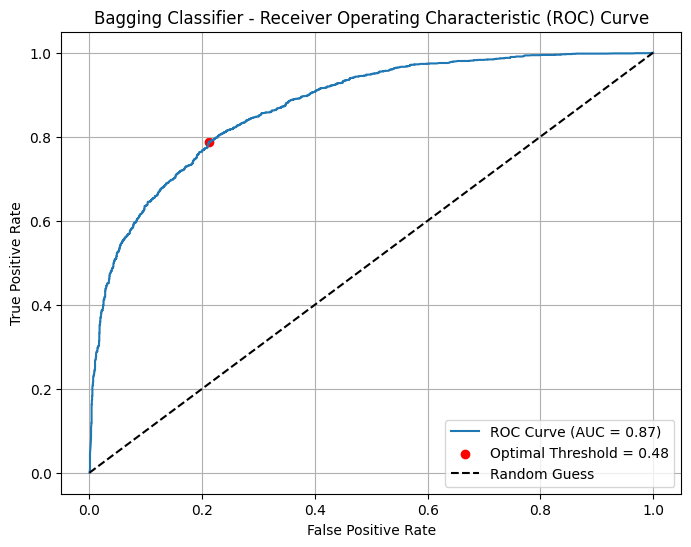

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/usr/local/lib/python3.1


AdaBoost Classifier 10-Fold Cross-Validation Classification Report:
              precision    recall  f1-score   support

           0     0.7530    0.7623    0.7576      2120
           1     0.7282    0.7181    0.7231      1880

    accuracy                         0.7415      4000
   macro avg     0.7406    0.7402    0.7404      4000
weighted avg     0.7413    0.7415    0.7414      4000

AdaBoost Classifier 10-Fold Cross-Validation ROC AUC Score: 0.82
Optimal Threshold for AdaBoost Classifier: 0.49


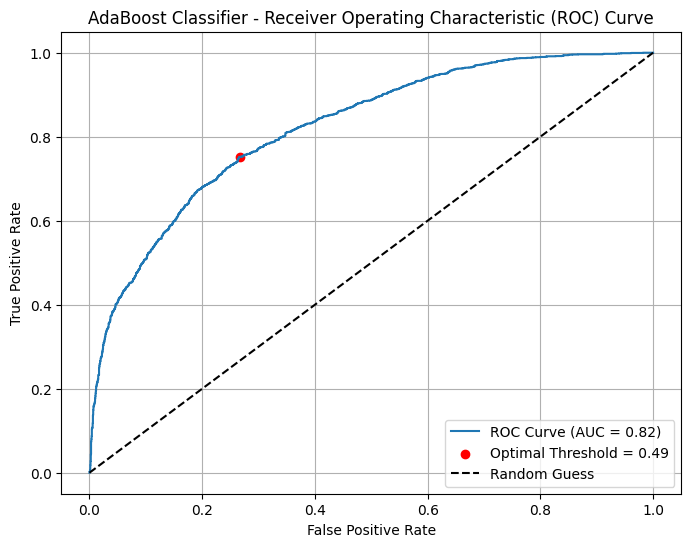


Gradient Boosting Classifier 10-Fold Cross-Validation Classification Report:
              precision    recall  f1-score   support

           0     0.7918    0.8146    0.8031      2120
           1     0.7839    0.7585    0.7710      1880

    accuracy                         0.7883      4000
   macro avg     0.7879    0.7866    0.7870      4000
weighted avg     0.7881    0.7883    0.7880      4000

Gradient Boosting Classifier 10-Fold Cross-Validation ROC AUC Score: 0.88
Optimal Threshold for Gradient Boosting Classifier: 0.51


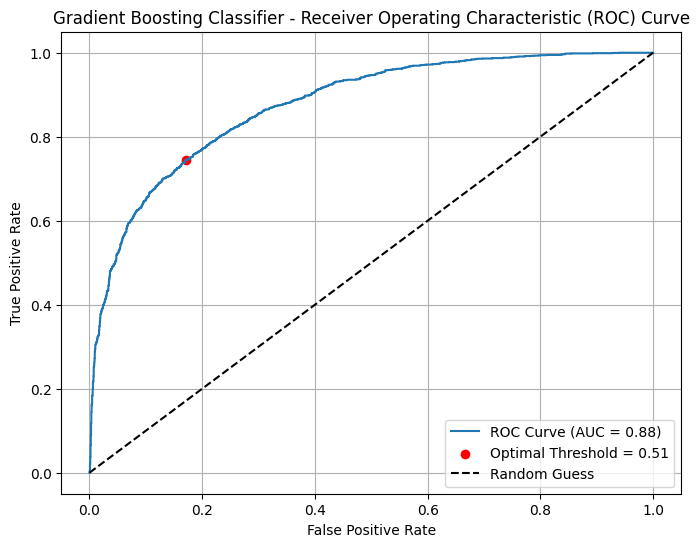

In [ ]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=10, random_state=42)
gb = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=5, random_state=42)
lr = LogisticRegression(max_iter=1000, C=0.1, random_state=42)  # Increase regularization with lower C

# Define ensemble models
voting_clf = VotingClassifier(estimators=[('dt', dt), ('rf', rf), ('gb', gb)], voting='soft')
bagging_clf = BaggingClassifier(estimator=dt, n_estimators=10, random_state=42)
boosting_clf = AdaBoostClassifier(estimator=dt, n_estimators=50, random_state=42)
gradient_boosting_clf = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, max_depth=5, random_state=42)

# Store the models in a dictionary for iteration
models = {
    'Voting Classifier': voting_clf,
    'Bagging Classifier': bagging_clf,
    'AdaBoost Classifier': boosting_clf,
    'Gradient Boosting Classifier': gradient_boosting_clf
}

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 2: Perform cross-validation on the training/validation set only
fold_values = 10

print(f"--- {fold_values}-Fold Cross-Validation on Training/Validation Set ---")
for model_name, model in models.items():
    y_pred_cv = cross_val_predict(model, X_train_scaled, y_train, cv=fold_values, method='predict_proba')[:, 1]

    # Display classification report for cross-validation
    print(f"\n{model_name} {fold_values}-Fold Cross-Validation Classification Report:")
    print(classification_report(y_train, y_pred_cv > 0.5, zero_division=0, digits=4))  # Use threshold 0.5 for classification

    fpr, tpr, thresholds = roc_curve(y_train, y_pred_cv)
    roc_auc = roc_auc_score(y_train, y_pred_cv)
    print(f"{model_name} 10-Fold Cross-Validation ROC AUC Score: {roc_auc:.2f}")

    # Find the optimal threshold
    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]
    print(f"Optimal Threshold for {model_name}: {optimal_threshold:.2f}")

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
    plt.scatter(fpr[optimal_idx], tpr[optimal_idx], color='red', label=f"Optimal Threshold = {optimal_threshold:.2f}")
    plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} - Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

## B) Neural Networks

we will use grid search and Random search to Systematically tested combinations of hyperparameters, such as the learning rate, batch size, number of units for neural networks.

first we start by hyperparameters tuning to find the optimal number of hyperparameter.



### Grid search

In [ ]:
def create_model(hidden_layers=1, neurons=32, learning_rate=0.001):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train_scaled.shape[1], activation='relu'))
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))  # Output layer
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model using KerasClassifier
model = KerasClassifier(model=create_model, verbose=0)

# Define a smaller grid for faster exploration
param_grid = {
    'model__hidden_layers': [1, 2],
    'model__neurons': [16, 32],
    'batch_size': [16, 32],
    'epochs': [50],
    'model__learning_rate': [0.001]
}

# Grid search with the corrected feature names
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=2)
grid_result = grid.fit(X_train_scaled, y_train)

# Print best parameters and accuracy
print("Best parameters found: ", grid_result.best_params_)
print("Best accuracy achieved: ", grid_result.best_score_)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__hidden_layers=1, model__learning_rate=0.001, model__neurons=16; total time=  17.8s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__hidden_layers=1, model__learning_rate=0.001, model__neurons=16; total time=  17.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__hidden_layers=1, model__learning_rate=0.001, model__neurons=16; total time=  18.6s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__hidden_layers=1, model__learning_rate=0.001, model__neurons=32; total time=  23.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__hidden_layers=1, model__learning_rate=0.001, model__neurons=32; total time=  25.9s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__hidden_layers=1, model__learning_rate=0.001, model__neurons=32; total time=  27.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__hidden_layers=2, model__learning_rate=0.001, model__neurons=16; total time=  28.4s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__hidden_layers=2, model__learning_rate=0.001, model__neurons=16; total time=  32.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__hidden_layers=2, model__learning_rate=0.001, model__neurons=16; total time=  18.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__hidden_layers=2, model__learning_rate=0.001, model__neurons=32; total time=  18.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__hidden_layers=2, model__learning_rate=0.001, model__neurons=32; total time=  20.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=16, epochs=50, model__hidden_layers=2, model__learning_rate=0.001, model__neurons=32; total time=  20.0s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__hidden_layers=1, model__learning_rate=0.001, model__neurons=16; total time=  10.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__hidden_layers=1, model__learning_rate=0.001, model__neurons=16; total time=  11.1s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__hidden_layers=1, model__learning_rate=0.001, model__neurons=16; total time=   7.9s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__hidden_layers=1, model__learning_rate=0.001, model__neurons=32; total time=   9.8s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__hidden_layers=1, model__learning_rate=0.001, model__neurons=32; total time=   9.9s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__hidden_layers=1, model__learning_rate=0.001, model__neurons=32; total time=   8.2s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__hidden_layers=2, model__learning_rate=0.001, model__neurons=16; total time=  11.9s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__hidden_layers=2, model__learning_rate=0.001, model__neurons=16; total time=  10.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__hidden_layers=2, model__learning_rate=0.001, model__neurons=16; total time=  10.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__hidden_layers=2, model__learning_rate=0.001, model__neurons=32; total time=   9.3s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__hidden_layers=2, model__learning_rate=0.001, model__neurons=32; total time=  10.7s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[CV] END batch_size=32, epochs=50, model__hidden_layers=2, model__learning_rate=0.001, model__neurons=32; total time=  10.6s


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best parameters found:  {'batch_size': 32, 'epochs': 50, 'model__hidden_layers': 2, 'model__learning_rate': 0.001, 'model__neurons': 16}
Best accuracy achieved:  0.7859984111470147


now we will use these hyperparameters to develop a neural network model to predict car preference.

In [ ]:

# Retrieve the best hyperparameters
best_params = grid_result.best_params_
hidden_layers = best_params['model__hidden_layers']
neurons = best_params['model__neurons']
learning_rate = best_params['model__learning_rate']
batch_size = best_params['batch_size']
epochs = best_params['epochs']

# Build the neural network model with the best hyperparameters
def build_best_model(hidden_layers=hidden_layers, neurons=neurons, learning_rate=learning_rate):
    model = Sequential()
    model.add(Dense(neurons, input_dim=X_train_scaled.shape[1], activation='relu'))

    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu'))

    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification

    # Compile model
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Initialize the model with the best hyperparameters
best_model = build_best_model()

# Train the model
best_model.fit(X_train_scaled, y_train, batch_size=batch_size, epochs=epochs, verbose=1)

# Evaluate the model on the test set
loss, accuracy = best_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5943 - loss: 0.6829
Epoch 2/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7715 - loss: 0.5049
Epoch 3/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7742 - loss: 0.4635
Epoch 4/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7740 - loss: 0.4687
Epoch 5/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7816 - loss: 0.4555
Epoch 6/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7831 - loss: 0.4412
Epoch 7/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7847 - loss: 0.4382
Epoch 8/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7794 - loss: 0.4481
Epoch 9/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7901 - loss: 0.4376
Epoch 10/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7964 - loss: 0.4287
Epoch 11/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7914 - loss: 0.4321
Epoch 12/50
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy

In [ ]:
y_pred_prob = best_model.predict(X_test_scaled)  # Predict probabilities
y_pred = (y_pred_prob > 0.5).astype(int).flatten()  # Convert probabilities to binary predictions

report = classification_report(y_test, y_pred, target_names=['Class 0', 'Class 1'])
print(report)


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

     Class 0       0.83      0.78      0.80       574
     Class 1       0.72      0.79      0.76       426

    accuracy                           0.78      1000
   macro avg       0.78      0.78      0.78      1000
weighted avg       0.79      0.78      0.78      1000



32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


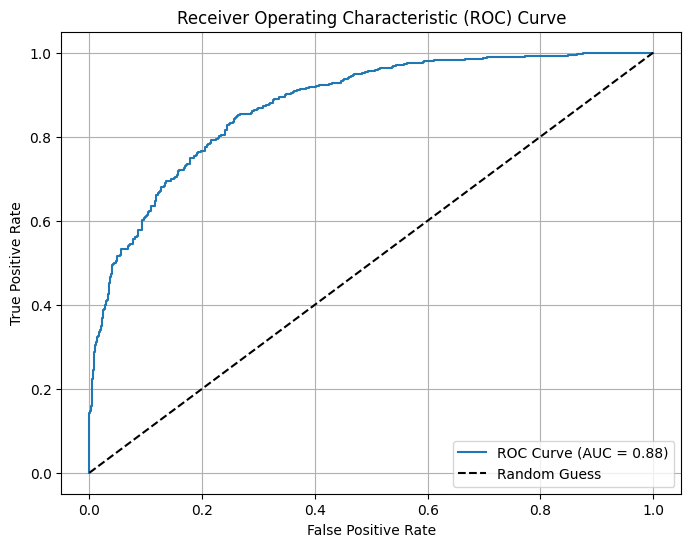

In [ ]:

# Predict probabilities on the test set
y_pred_proba = best_model.predict(X_test_scaled)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


# 5 Results

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


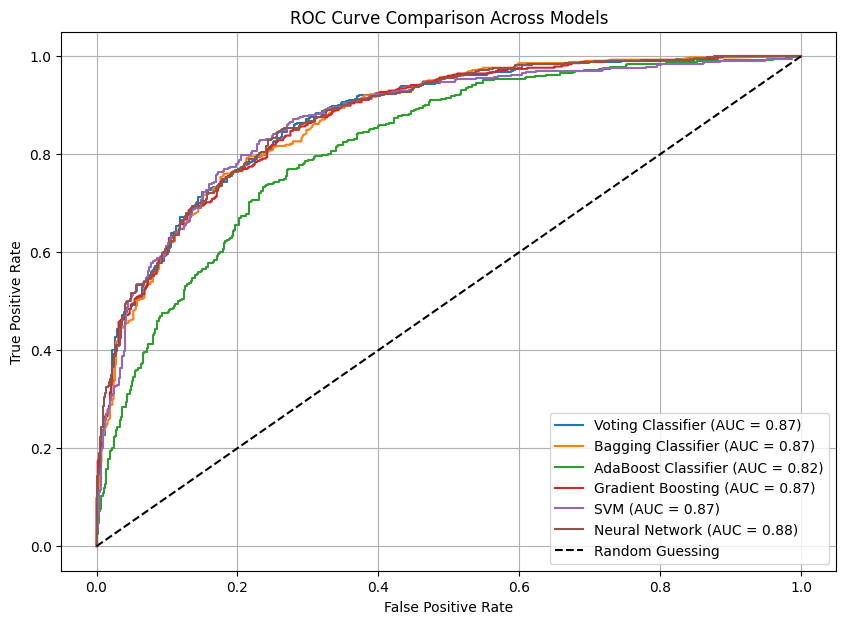

In [ ]:

# Dictionary of trained models
trained_models = {
    'Voting Classifier': voting_clf.fit(X_train_scaled, y_train),
    'Bagging Classifier': bagging_clf.fit(X_train_scaled, y_train),
    'AdaBoost Classifier': boosting_clf.fit(X_train_scaled, y_train),
    'Gradient Boosting': gradient_boosting_clf.fit(X_train_scaled, y_train),
    'SVM': svm_model.fit(X_train_scaled, y_train),
    'Neural Network': best_model  # Already trained above
}

# Initialize the plot
plt.figure(figsize=(10, 7))

# Generate ROC curves
for model_name, model in trained_models.items():
    # Get probabilities or decision scores
    if model_name == 'Neural Network':
        y_pred_prob = model.predict(X_test_scaled).flatten()  # Neural network outputs directly
    else:
        y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Plot the ROC curve
    plt.plot(fpr, tpr, label=f"{model_name} (AUC = {roc_auc:.2f})")

# Plot the random guessing baseline
plt.plot([0, 1], [0, 1], 'k--', label="Random Guessing")

# Customize the plot
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison Across Models")
plt.legend(loc="lower right")
plt.grid(True)

# Show the plot
plt.show()


The ROC curve comparison shows that most models, like the Voting Classifier, Bagging Classifier, Gradient Boosting, and SVM, perform similarly with an AUC of around **0.87**, meaning they are effective at classifying the data. The Neural Network performs slightly better with an AUC of **0.88**, but the improvement is small. The AdaBoost Classifier, however, lags behind with an AUC of **0.82**, making it the weakest model. All models perform much better than random guessing (AUC = 0.5). While the Neural Network is the best, simpler models like Gradient Boosting or the Voting Classifier may be sufficient for most purposes, given their similar performance.

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Model Comparison Results:
                 Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
0    Voting Classifier     0.788   0.745413  0.762911  0.754060  0.874949
1   Bagging Classifier     0.783   0.733781  0.769953  0.751432  0.871728
2  AdaBoost Classifier     0.749   0.693157  0.737089  0.714448  0.817879
3    Gradient Boosting     0.787   0.741497  0.767606  0.754325  0.872395
4                  SVM     0.799   0.764706  0.762911  0.763807  0.869510
5       Neural Network     0.783   0.723769  0.793427  0.756999  0.875787


<Figure size 1200x800 with 0 Axes>

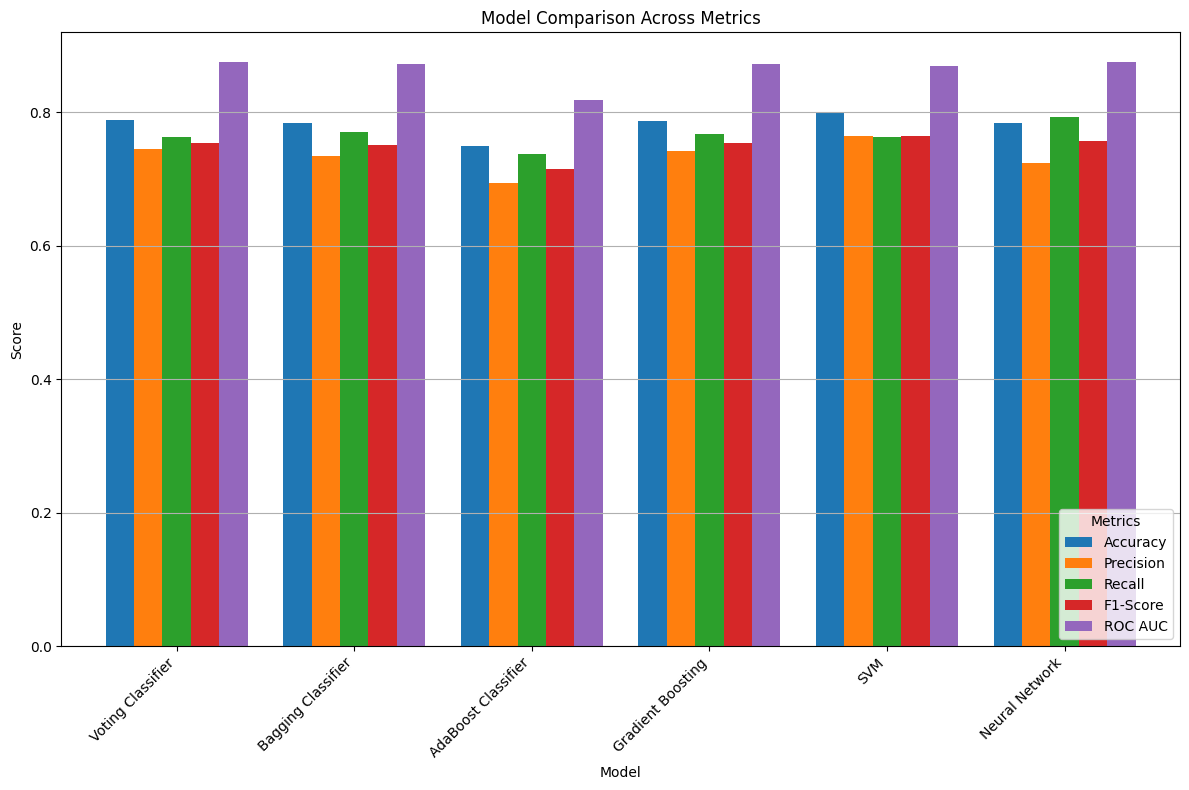

In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Initialize a dictionary to store metrics
model_metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "ROC AUC": []
}

# Calculate metrics for each model
for model_name, model in trained_models.items():
    # Get predictions and probabilities
    if model_name == "Neural Network":
        y_pred_prob = model.predict(X_test_scaled).flatten()  # Neural network outputs directly
        y_pred = (y_pred_prob > 0.5).astype(int)
    else:
        y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probabilities for class 1
        y_pred = model.predict(X_test_scaled)

    # Compute metrics
    model_metrics["Model"].append(model_name)
    model_metrics["Accuracy"].append(accuracy_score(y_test, y_pred))
    model_metrics["Precision"].append(precision_score(y_test, y_pred))
    model_metrics["Recall"].append(recall_score(y_test, y_pred))
    model_metrics["F1-Score"].append(f1_score(y_test, y_pred))
    model_metrics["ROC AUC"].append(roc_auc_score(y_test, y_pred_prob))

# Convert metrics to a DataFrame
comparison_df = pd.DataFrame(model_metrics)

# Display the DataFrame
print("Model Comparison Results:")
print(comparison_df)

# Visualization of Model Metrics
metrics = ["Accuracy", "Precision", "Recall", "F1-Score", "ROC AUC"]

# Plot comparison for each metric
plt.figure(figsize=(12, 8))
comparison_df.set_index("Model")[metrics].plot(kind='bar', figsize=(12, 8), width=0.8)
plt.title("Model Comparison Across Metrics")
plt.ylabel("Score")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Metrics", loc="lower right")
plt.grid(axis='y')
plt.tight_layout()
plt.show()


The bar chart shows that most models, including the Voting Classifier, Bagging Classifier, Gradient Boosting, and SVM, perform similarly across all metrics (accuracy, precision, recall, F1-score, and ROC AUC). The Neural Network stands out slightly, with the highest scores, especially in ROC AUC, making it the best-performing model overall. However, the difference is small, and simpler models like Gradient Boosting or the Voting Classifier could be just as effective. On the other hand, the AdaBoost Classifier performs the worst across all metrics, suggesting it may not be well-suited for this dataset. Overall, most models perform well, with minor differences in effectiveness.

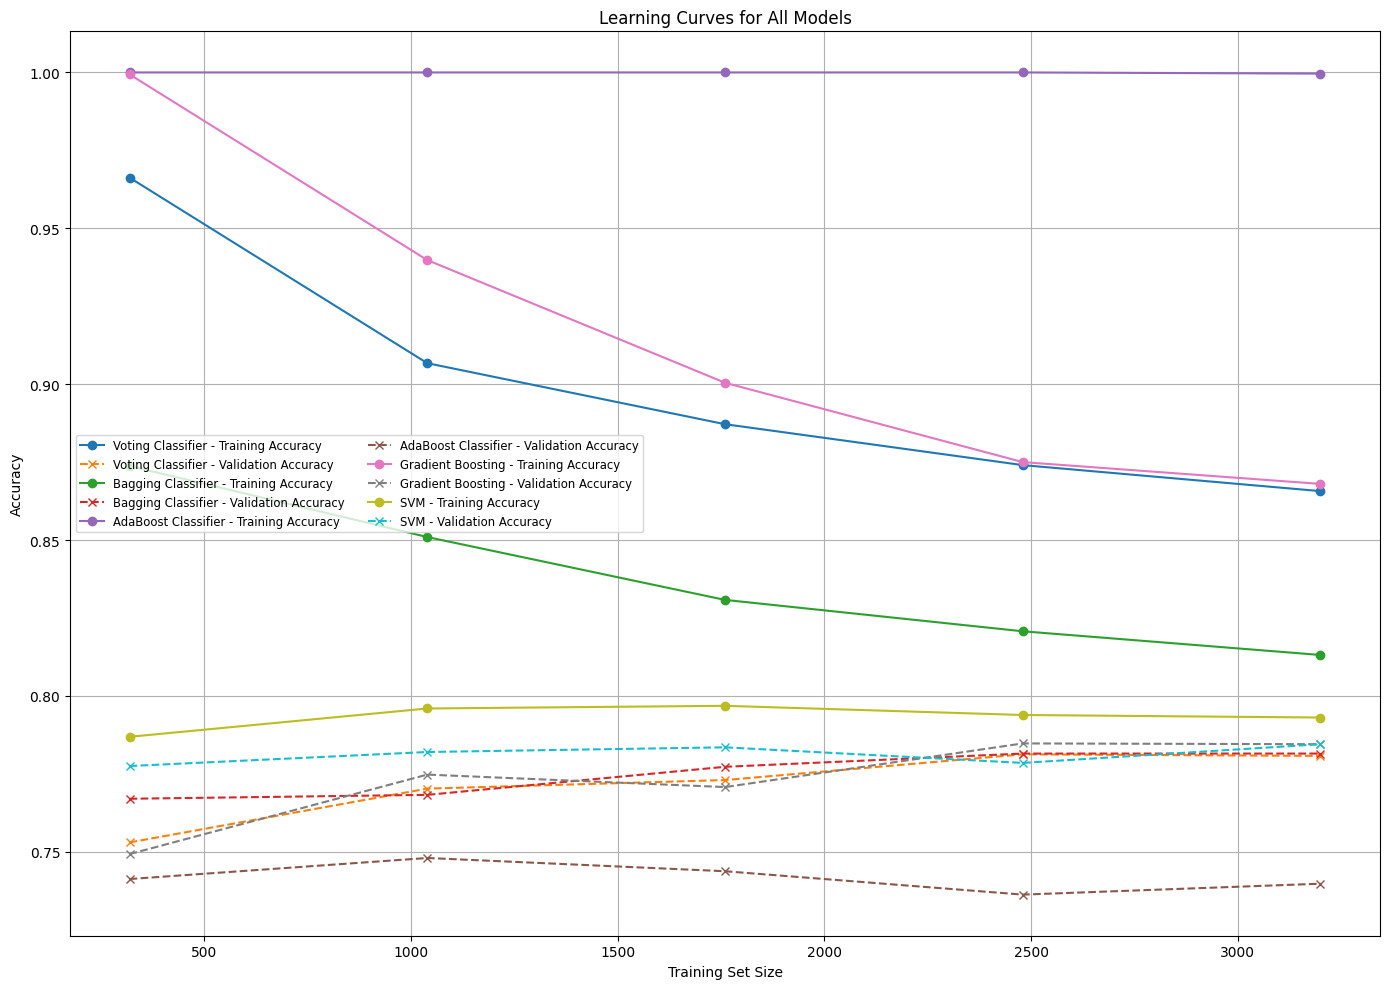

In [ ]:



# Function to plot learning curves for all models in one figure
def plot_learning_curves_all_models(trained_models, X_train, y_train):
    plt.figure(figsize=(14, 10))

    # Generate learning curves for each model
    for model_name, model in trained_models.items():
        if model_name == "Neural Network":
            # Skip Neural Network as it is not scikit-learn compatible for learning curves
            continue

        # Calculate learning curves
        train_sizes, train_scores, test_scores = learning_curve(
            model, X_train, y_train,
            train_sizes=np.linspace(0.1, 1.0, 5),
            cv=5, scoring='accuracy', n_jobs=-1
        )
        train_mean = train_scores.mean(axis=1)
        test_mean = test_scores.mean(axis=1)

        # Plot each model's learning curve
        plt.plot(train_sizes, train_mean, marker='o', label=f"{model_name} - Training Accuracy")
        plt.plot(train_sizes, test_mean, marker='x', linestyle='--', label=f"{model_name} - Validation Accuracy")

    # Customize the plot
    plt.title("Learning Curves for All Models")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy")
    plt.legend(loc="best", fontsize='small', ncol=2)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Call the function to generate the combined plot
plot_learning_curves_all_models(trained_models, X_train_scaled, y_train)




1. **AdaBoost Classifier**:
   - The training accuracy remains consistently at 100%, indicating the model perfectly fits the training data.
   - However, the validation accuracy is much lower (~75%) and remains flat, suggesting the model is overfitting the training data and struggles to generalize.

2. **SVM**:
   - Training accuracy starts high but slightly decreases as more data is added, stabilizing around 79.5%.
   - Validation accuracy improves with more training data, indicating that the model benefits from more samples and has good generalization potential.

3. **Gradient Boosting**:
   - Training accuracy starts very high (close to 100%) but decreases as more data is added, leveling out at around 90%.
   - Validation accuracy starts low (~75%) but slightly improves with more data, indicating a reduction in overfitting and better generalization as training size increases.

4. **Bagging Classifier**:
   - Training accuracy decreases as training size increases, stabilizing around 82%.
   - Validation accuracy starts lower (~77%) but improves with more data, showing good generalization and benefits from additional data.

5. **Voting Classifier**:
   - Training accuracy decreases from ~95% to ~85% as training size grows, which is typical for ensemble models.
   - Validation accuracy starts around 75% and gradually improves with more data, indicating consistent generalization and stability.

### Insights:
- **Overfitting**: AdaBoost suffers from significant overfitting, as shown by its perfect training accuracy but low validation accuracy.
- **Best Generalization**: Models like the Bagging Classifier, Gradient Boosting, and Voting Classifier show a good balance between training and validation accuracy, demonstrating strong generalization.
- **Data Dependency**: SVM and ensemble models (Bagging, Gradient Boosting, and Voting Classifier) show improved performance with more training data, suggesting that additional data could further enhance their validation accuracy.

Overall, the Gradient Boosting, Bagging, and Voting Classifiers are the most promising models, while AdaBoost requires further tuning to address overfitting.